### HR Analytics Project- Understanding the Attrition in HR
#### Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?  
  
#### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
  
#### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies 
  
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


#### Dataset Link-  
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'https://raw.githubusercontent.com/manishkumbhare/Internship/main/datasets/ibm-hr-analytics-employee-attrition-performance.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

Rows : 1470, Columns : 35

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Object columns : 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18' and 'OverTime'  
remaining columns are 'int64' datatype

In [5]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [6]:
data['EmployeeNumber'].value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [7]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [8]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

#### #Observations:
1. column 'EmployeeCount' is having only 1 as value, so this column is not making any sense
2. column 'EmployeeNumber' is only showing unike ID for the employee, so this also not adding any information to dataset
3. column 'StandardHours' is having only 80 as value, so this column is also not making any sense
4. Also it seems that this organization hire people who have age greater that 18 as the column 'Over18' having all values as 'Yes', so this data column is also not adding any information to data

#### Dropping columns 'EmployeeCount', 'EmployeeNumber', 'Over18' and 'StandardHours'

In [9]:
data=data.drop(['EmployeeCount'], axis=1)
data=data.drop(['EmployeeNumber'], axis=1)
data=data.drop(['StandardHours'], axis=1)
data=data.drop(['Over18'], axis=1)

In [10]:
data.sample(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
128,22,No,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,...,3,3,1,3,2,3,2,1,2,1
381,30,No,Travel_Rarely,202,Sales,2,1,Technical Degree,3,Male,...,3,1,1,1,3,3,1,0,0,0
431,54,No,Travel_Rarely,548,Research & Development,8,4,Life Sciences,3,Female,...,3,3,0,19,3,3,1,0,0,0
878,42,No,Non-Travel,179,Human Resources,2,5,Medical,4,Male,...,3,1,1,10,3,4,4,3,0,3
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,Female,...,3,1,1,16,5,1,4,3,0,3
1428,32,No,Travel_Rarely,234,Sales,1,4,Medical,2,Male,...,3,2,1,3,2,3,2,2,2,2
261,38,No,Non-Travel,1327,Sales,2,2,Life Sciences,4,Male,...,3,4,1,13,0,3,8,7,7,5


In [11]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### Observation: NO null values

### Our Target column is 'Attrition' as we are analysing over that only

In [12]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

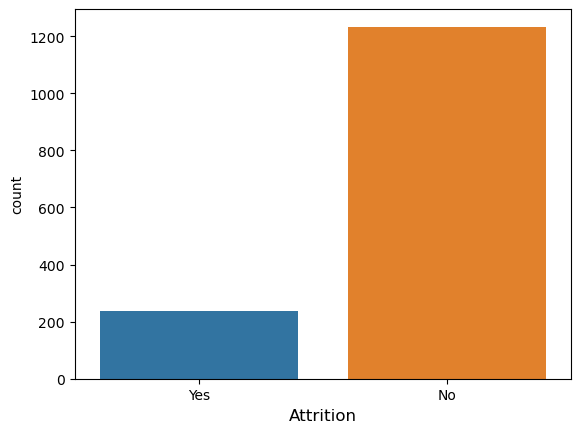

In [13]:
sns.countplot(data['Attrition'])
plt.xlabel('Attrition', fontsize=12)
plt.show()

#### Observations:
1. the column 'Attrition' contains Catagorical values so our problem is related to 'Binary Classification'
2. There is imbalance in data as the count of 'No' is way high than 'Yes'

### # EDA

In [14]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### # Encoding the object data types

In [16]:
lab=LabelEncoder()
test=[]
test=data[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 
           'JobRole', 'MaritalStatus', 'OverTime']]
for column in test:
    df=lab.fit_transform(test[column])
    test[column]=pd.Series(df)
    data[column]=test[column]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

#### now all the columns are having int64 data type

In [17]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Observations:
the columns having continious data such as 'Age','DailyRate','DistanceFromHome','TotalWorkingYears' and 'YearsAtCOmpany' are having mean and 50% almost equal so the distribuion seems to be around mean

#### #dist plot

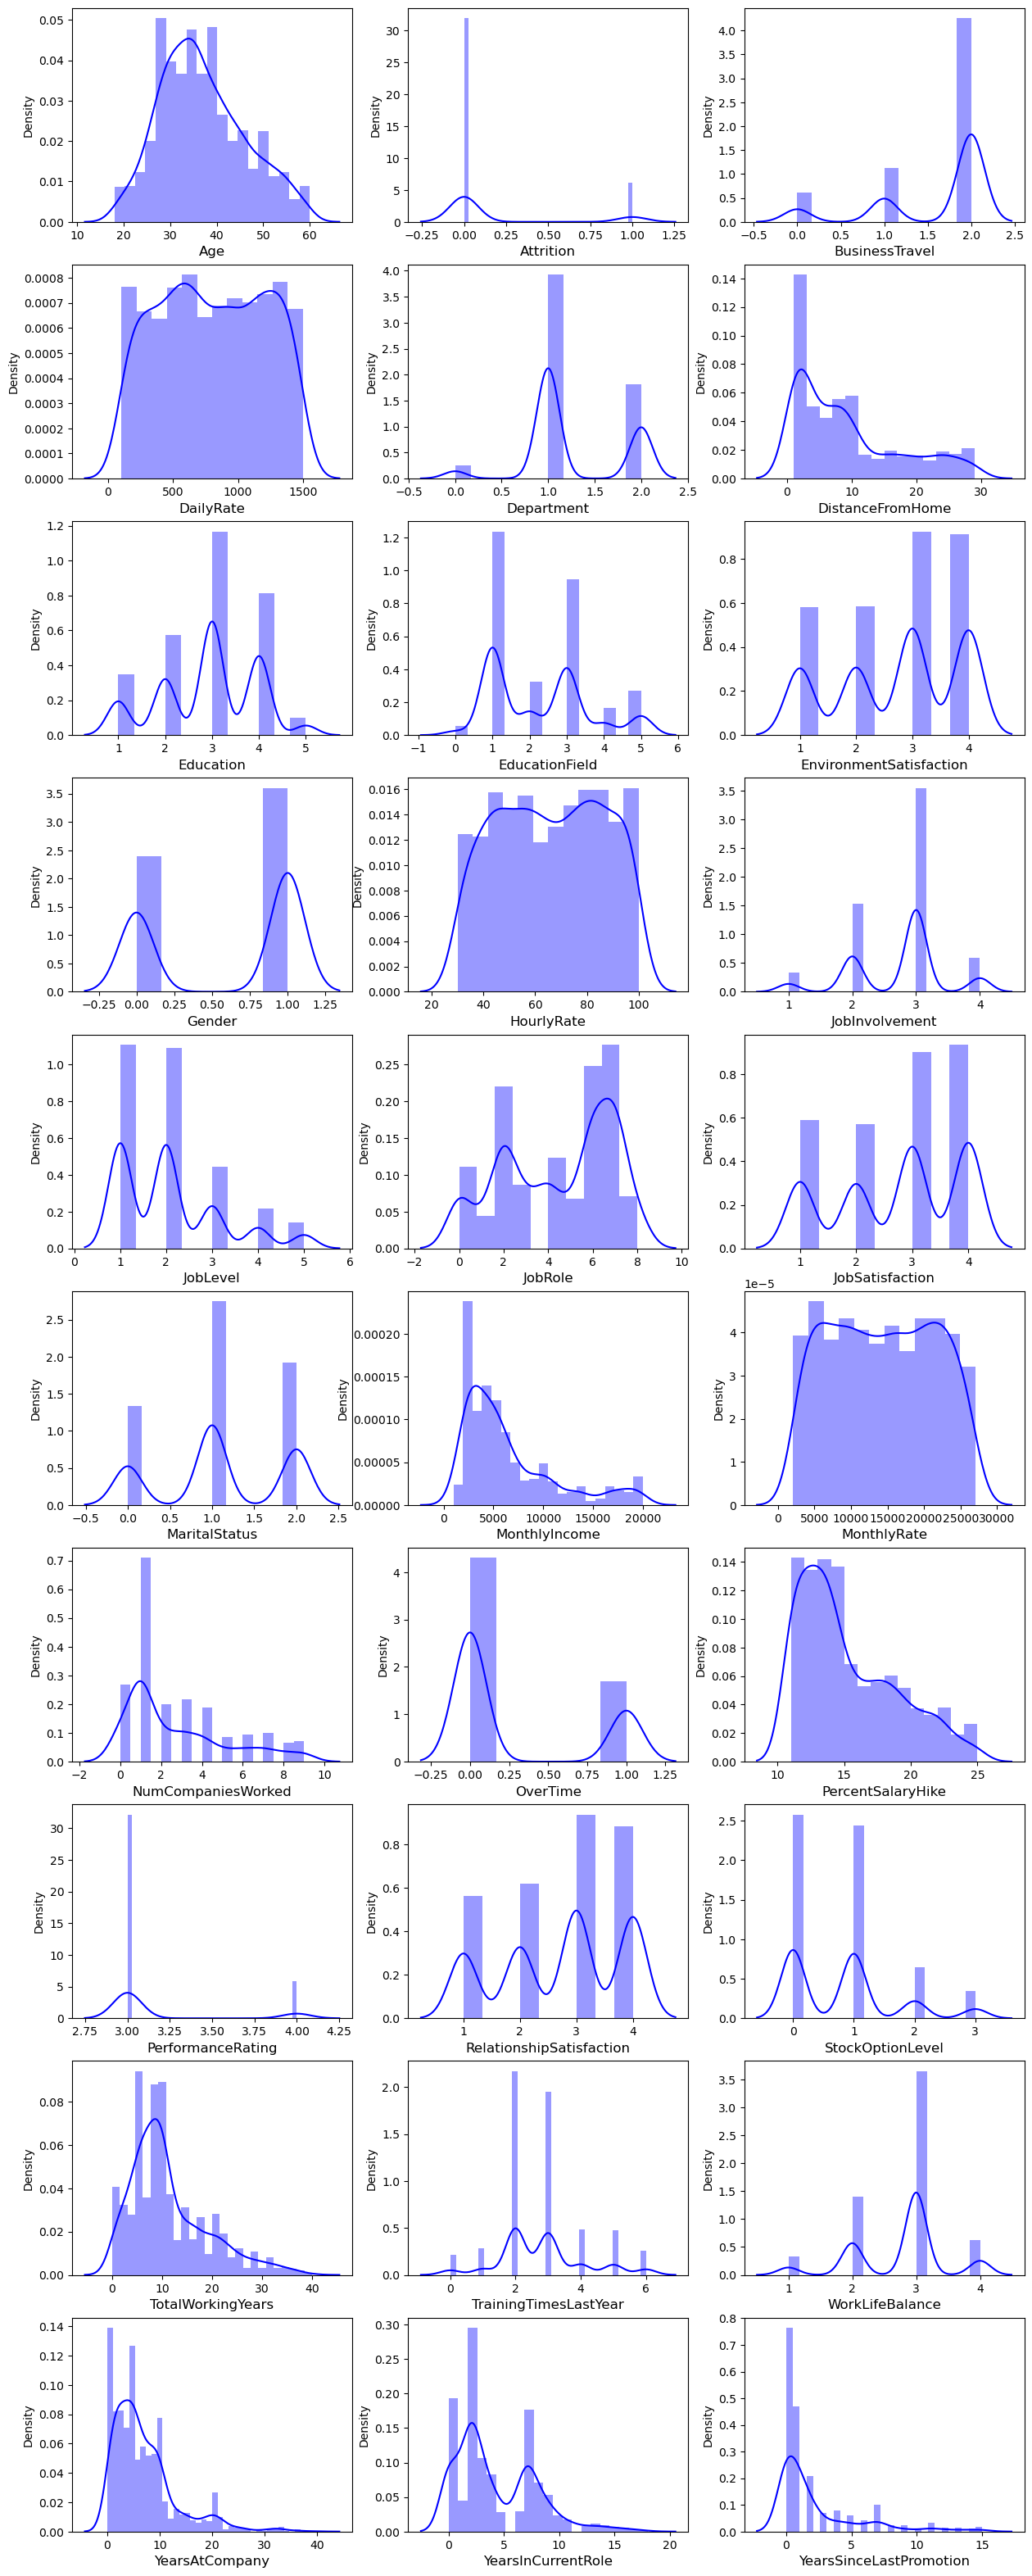

In [18]:
plt.figure(figsize=(15,40))
pltno=1
for column in data:
    if pltno<=30:
        plt.subplot(10,3,pltno)
        sns.distplot(data[column], color='b')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### # Observations:
1. data is looking skewd towards Right for the columns 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole' and 'YearsSinceLastPromotion'

#### # Checing skewness

In [19]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

#### Observations:
data for some columns seems to be skewed 
1. 'Attrition' column is Target column so keeping the column as it is
2. columns - 'BusinessTravel', 'JobLevel', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'StockOptionLevel' are categorical columns so keeping these columns as it is
3. columns - 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager' are having Continious data so need to work on skewness


#### # Box plot

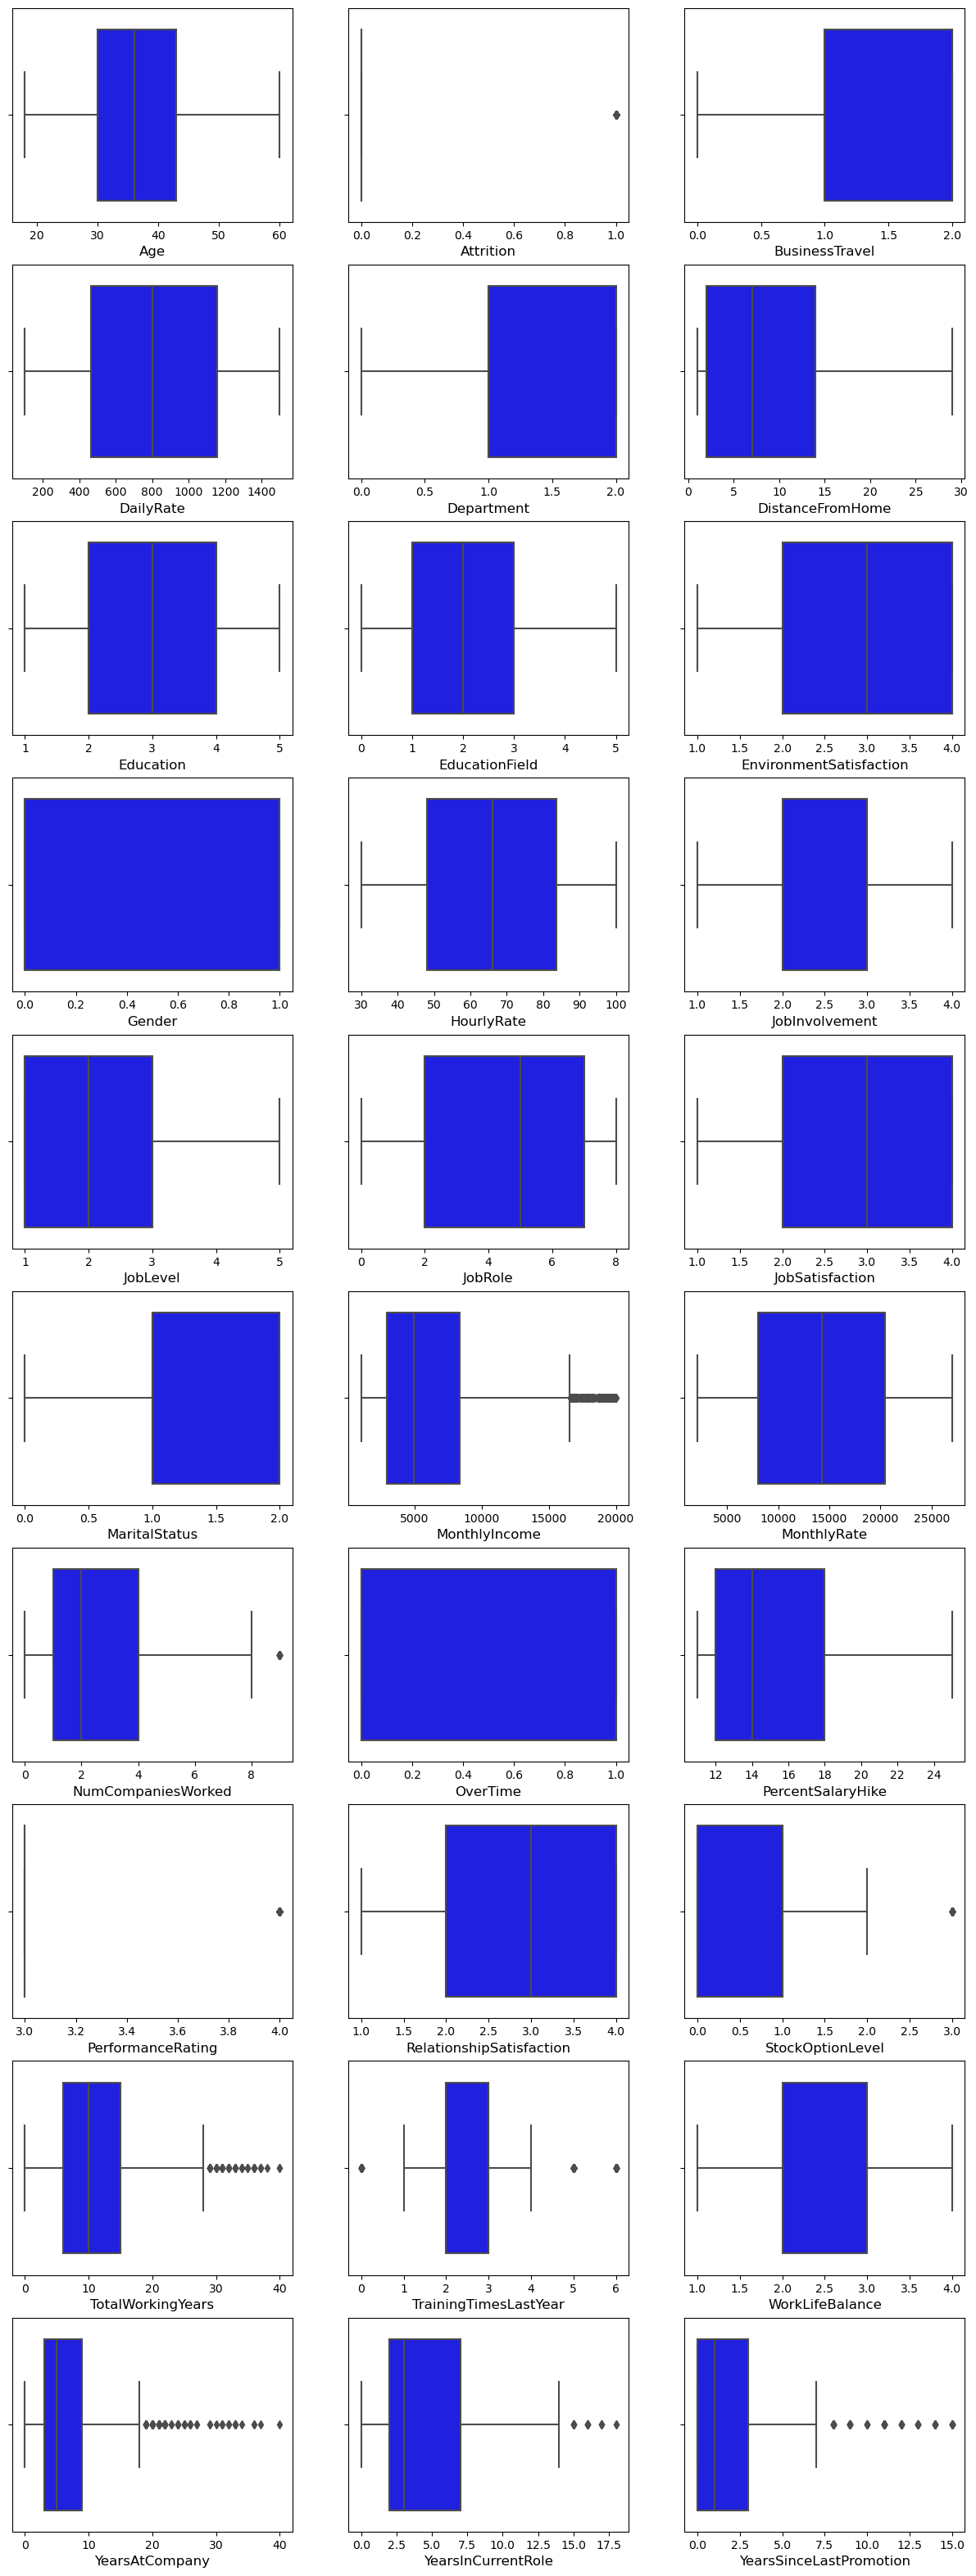

In [20]:
plt.figure(figsize=(15,40))
pltno=1
for column in data:
    if pltno<=30:
        plt.subplot(10,3,pltno)
        sns.boxplot(data[column], color='b')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### # Sqrt Mtehod for removing skewness
as the columns are having '0' values we can not use log method, so going for 'sqrt' method

In [21]:
#sqrt method
temp=data[['DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
sqrt_temp=np.sqrt(temp)
sqrt_temp.skew()


DistanceFromHome           0.398114
MonthlyIncome              0.861960
NumCompaniesWorked         0.031303
PercentSalaryHike          0.655412
TotalWorkingYears          0.176358
YearsAtCompany             0.426835
YearsInCurrentRole        -0.254344
YearsSinceLastPromotion    0.739126
YearsWithCurrManager      -0.254611
dtype: float64

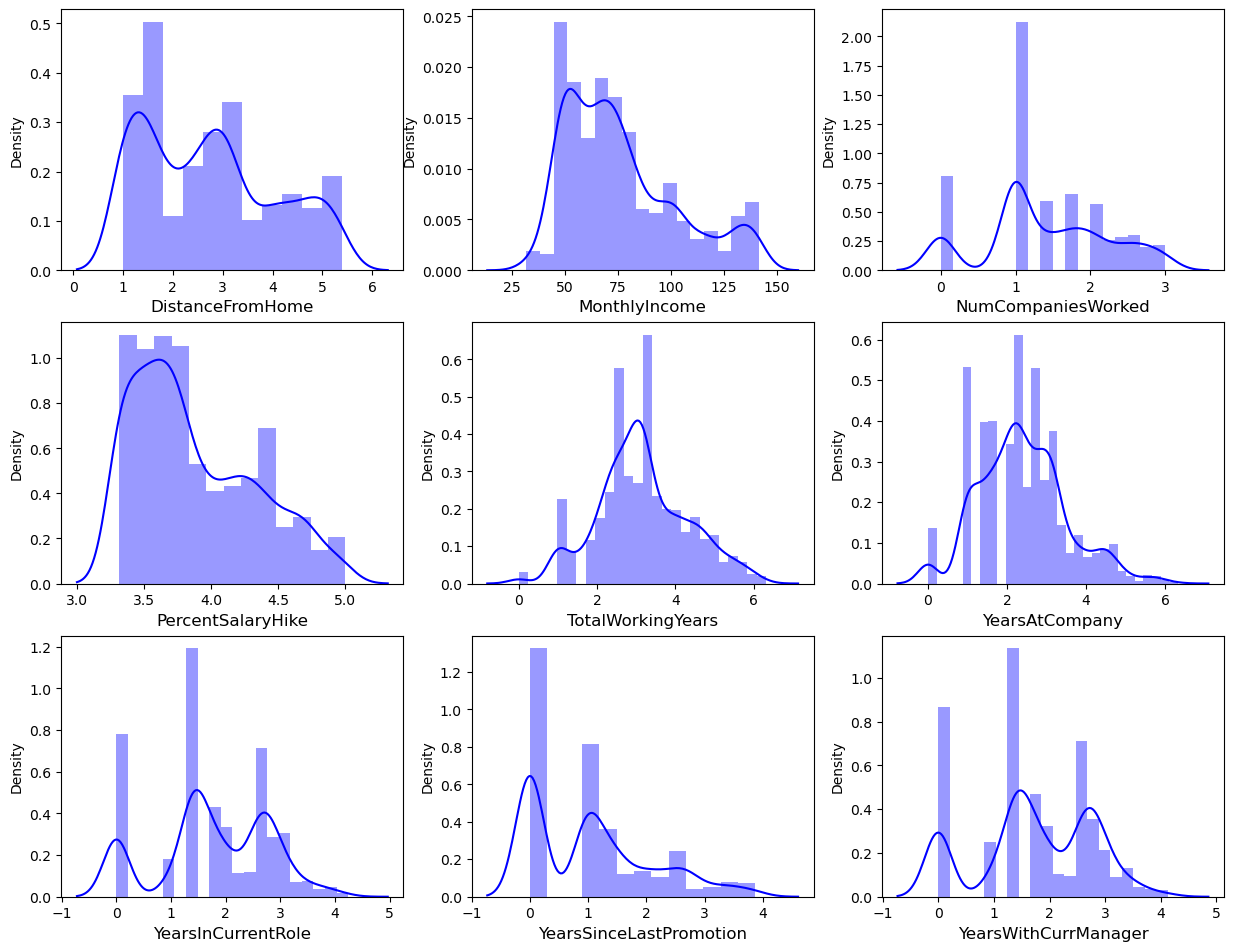

In [22]:
plt.figure(figsize=(15,40))
pltno=1
for column in sqrt_temp:
    if pltno<=30:
        plt.subplot(10,3,pltno)
        sns.distplot(sqrt_temp[column], color='b')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### # dist plot looking good now, so we assign these values to our main data set

In [23]:
data['DistanceFromHome'] = sqrt_temp['DistanceFromHome']
data['MonthlyIncome'] = sqrt_temp['MonthlyIncome']
data['NumCompaniesWorked'] = sqrt_temp['NumCompaniesWorked']
data['PercentSalaryHike'] = sqrt_temp['PercentSalaryHike']
data['TotalWorkingYears'] = sqrt_temp['TotalWorkingYears']
data['YearsAtCompany'] = sqrt_temp['YearsAtCompany']
data['YearsInCurrentRole'] = sqrt_temp['YearsInCurrentRole']
data['YearsSinceLastPromotion'] = sqrt_temp['YearsSinceLastPromotion']
data['YearsWithCurrManager'] = sqrt_temp['YearsWithCurrManager']

In [24]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.398114
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
OverTime                    0.964489
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [25]:
data.shape

(1470, 31)

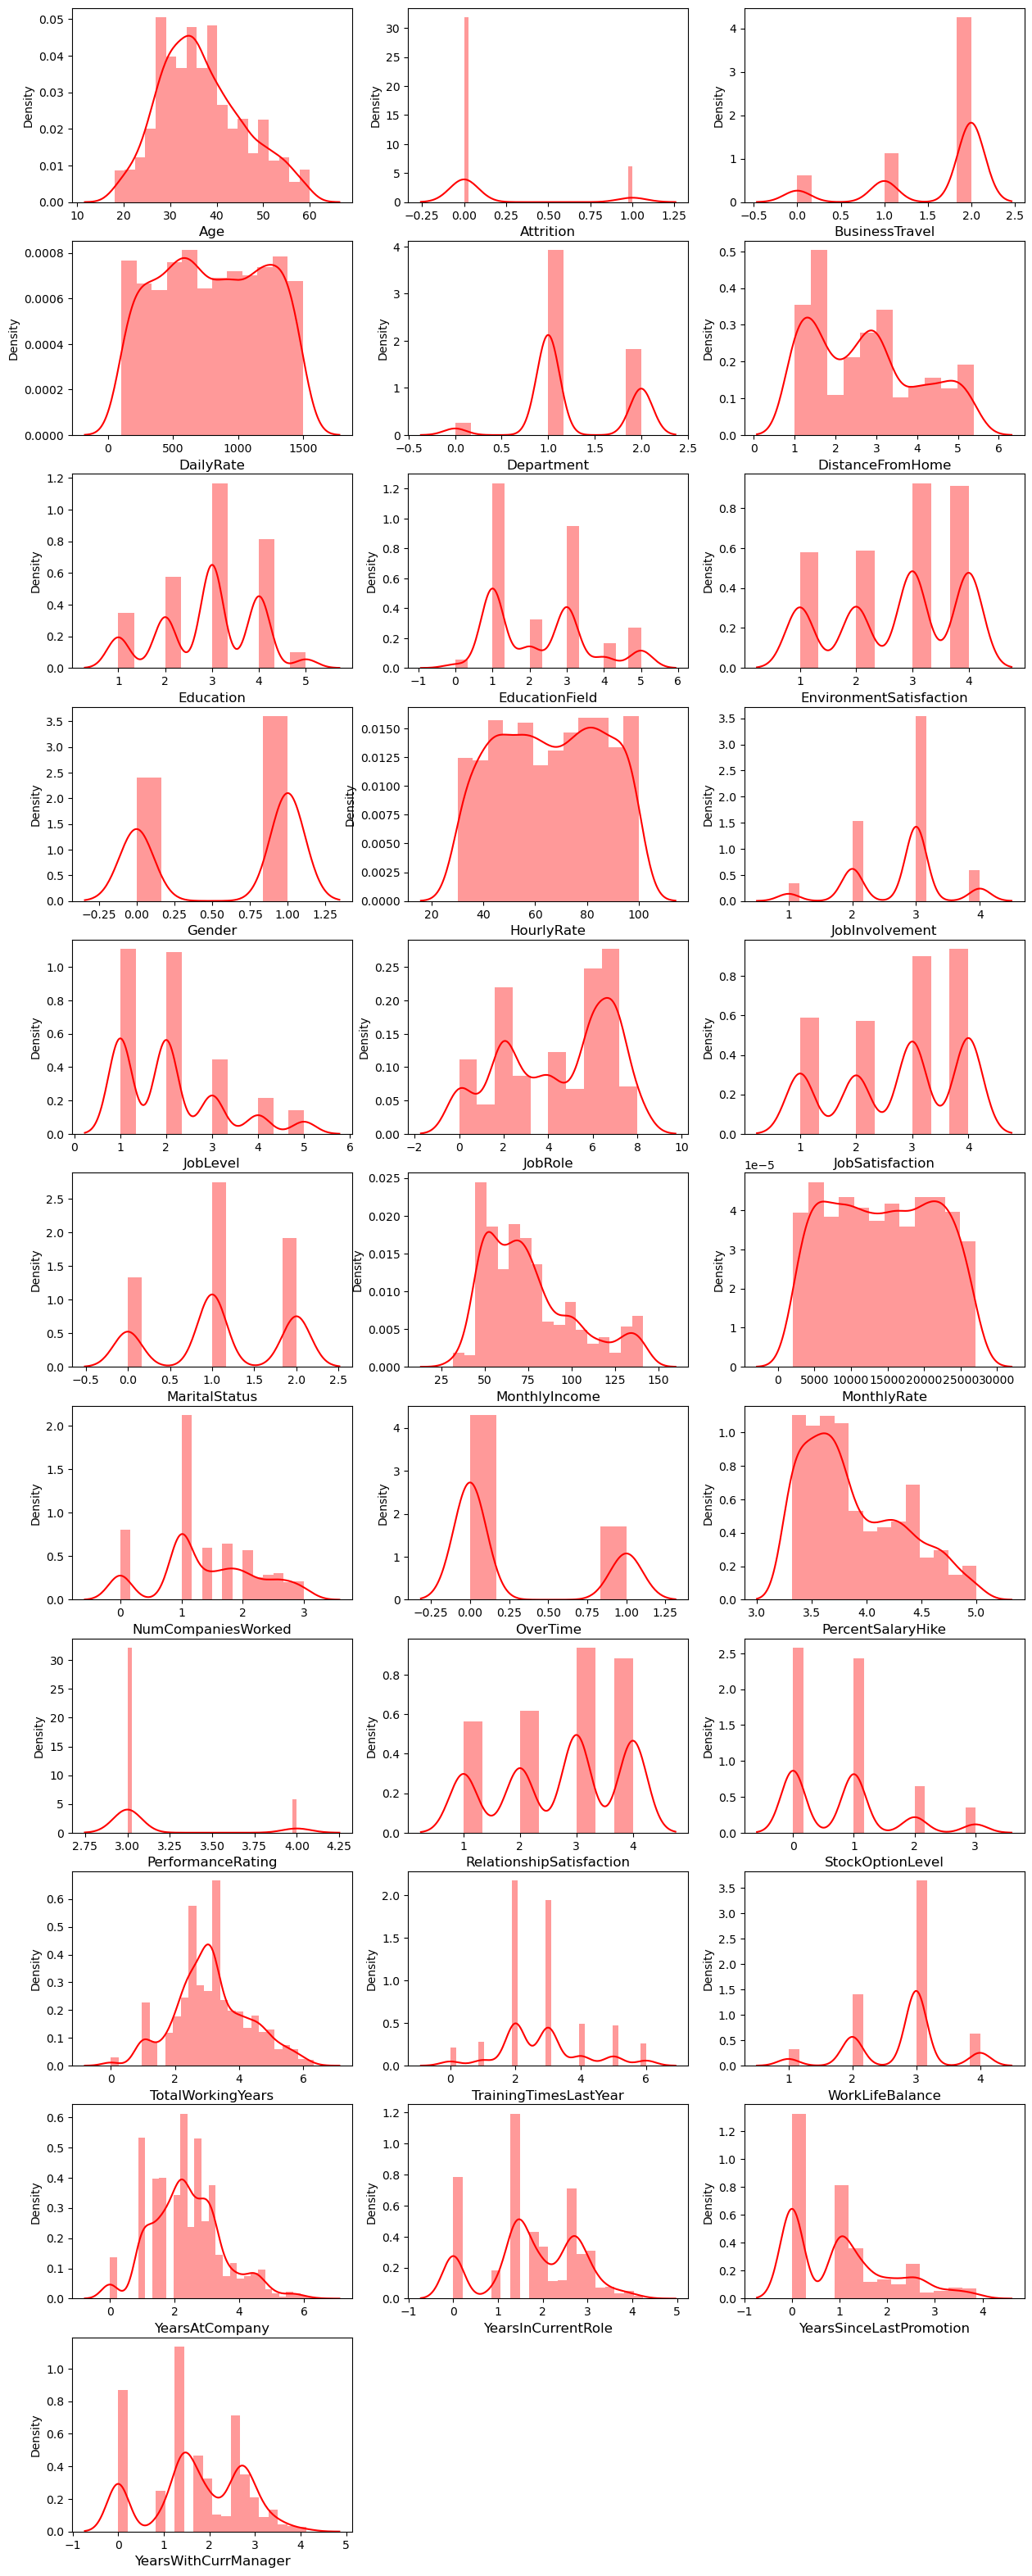

In [26]:
plt.figure(figsize=(15,40))
pltno=1
for column in data:
    if pltno<=31:
        plt.subplot(11,3,pltno)
        sns.distplot(data[column], color='r')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### data is Better in shape now

### # Multi-corelation heatmap

In [27]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.013684,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.682115,-0.019621,-0.021490,0.291655,0.190985,0.196728,0.179260
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.079576,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.208334,-0.059478,-0.063939,-0.178602,-0.186062,-0.049097,-0.191258
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.015805,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.038899,0.015240,-0.011256,-0.010077,-0.020794,-0.031610,-0.015272
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.003880,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.020250,0.002453,-0.037848,-0.018989,0.011602,-0.038077,0.000150
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.023651,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.009965,0.036875,0.026383,0.019240,0.046525,0.027731,0.022685
DistanceFromHome,-0.013684,0.079576,-0.015805,-0.003880,0.023651,1.000000,0.020829,0.005533,-0.012138,0.003381,...,0.018343,0.008395,0.036655,-0.000272,-0.026869,-0.025353,0.008864,0.019461,0.003526,0.005455
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.020829,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.166427,-0.025100,0.009819,0.065393,0.058130,0.040684,0.055914
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.005533,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.021133,0.049195,0.041191,-0.009698,0.004503,0.008178,0.012709
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.012138,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.014330,-0.019359,0.027627,0.005040,0.015530,0.026446,-0.001343
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,0.003381,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.045125,-0.038787,-0.002753,-0.039305,-0.039626,-0.027172,-0.025735


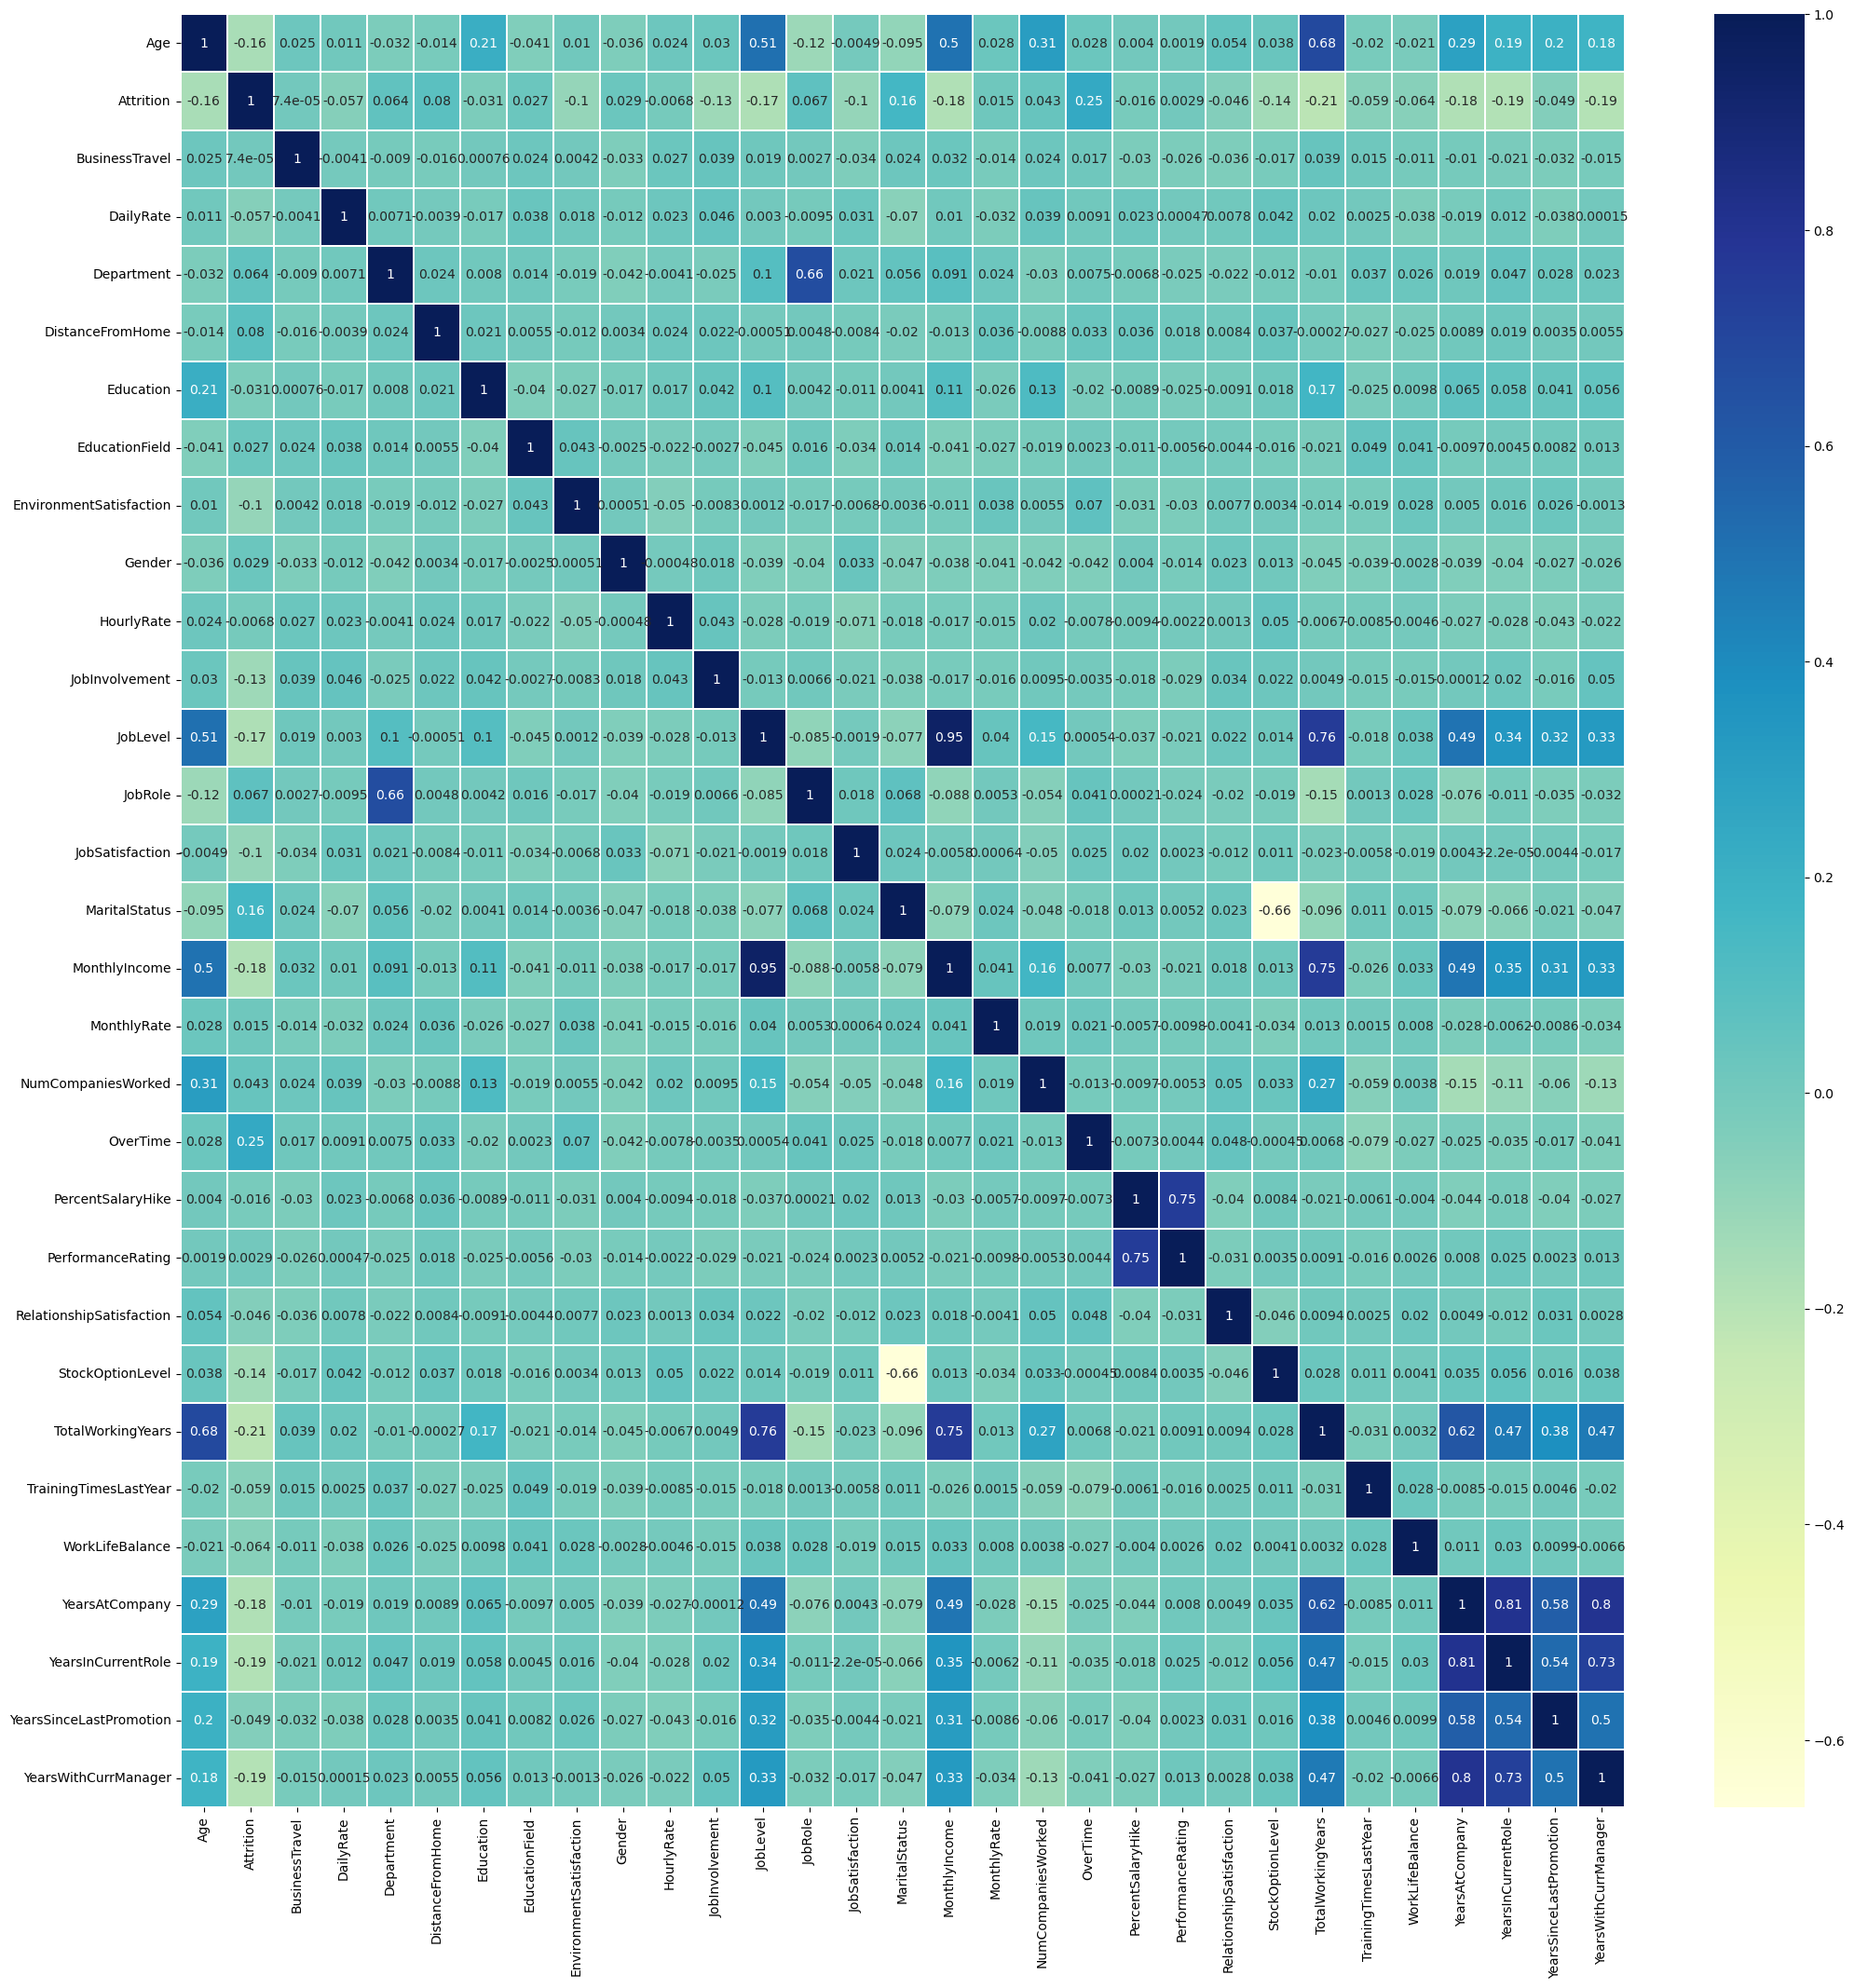

In [28]:
plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.2)
plt.show()

#### # Observation:
1. The column 'MonthlyIncome' is 95% corelated to 'JobLevel' column
2. column 'YearsAtCompany ' is 80% corelated to column 'YearsWithCurrManager' AND 81% corelated to column 'YearsInCurrentRole'
3. column 'TotalWorkingYears ' is 76% corelated to column 'JobLevel' AND 75% corelated to column 'MonthlyIncome'
4. columns 'MonthlyIncome', 'JobLevel', 'YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole' and 'TotalWorkingYears' are -17.86 %, -16.91 %, -17.86 %, -19.21 %, -18.60 %, -20.83 % corelated to target column respectively

#### #dropping columns 'JobLevel' and  'YearsAtCompany'

In [29]:
data.drop(['JobLevel', 'YearsAtCompany'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   int32  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int32  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int32  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int32  
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobRole                   1470 non-null   int32  
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

#### #replotting multi co-relation heatmap

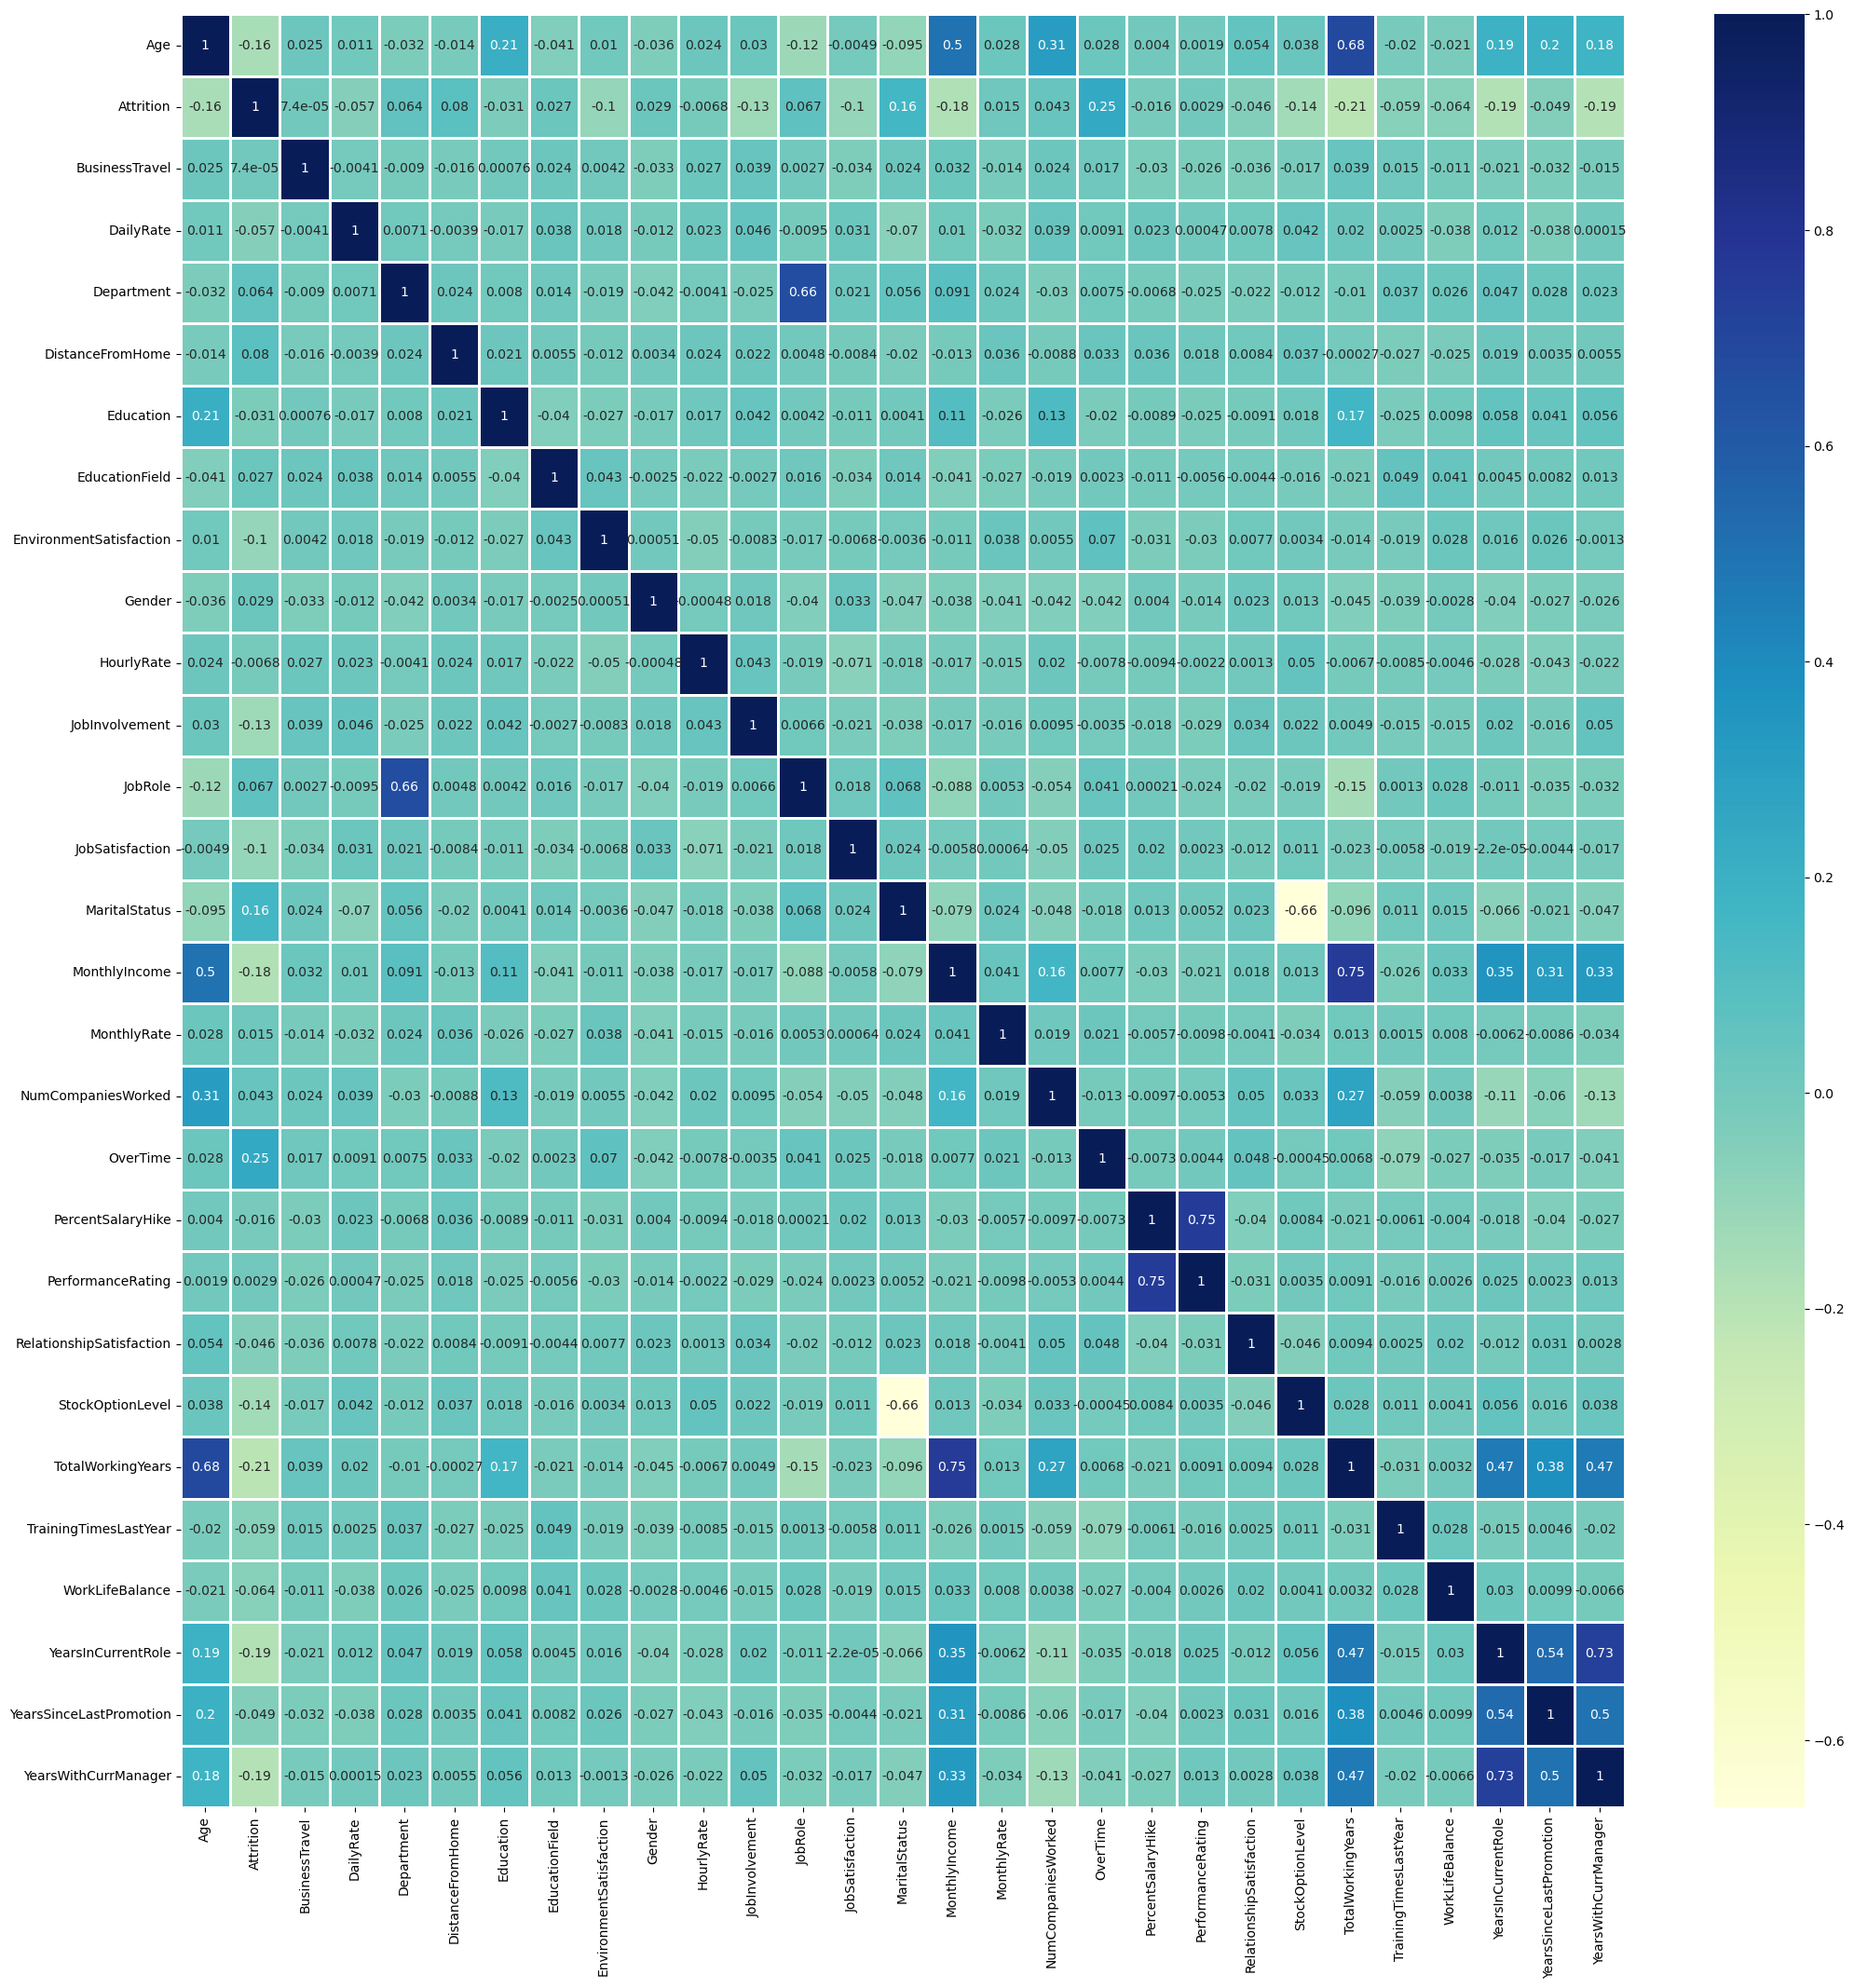

In [30]:
plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=2)
plt.show()

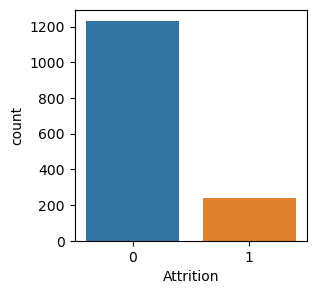

In [31]:
plt.figure(figsize=(3,3))
sns.countplot(x='Attrition',data=data)
plt.show()

#### We clearly having imbalaced data at target column 

### # Using Oversampling Method for balancing the data

In [32]:
from imblearn.over_sampling import SMOTE
X=data.drop(['Attrition'], axis=1)
y=data['Attrition']

sm=SMOTE()
x1,y1=sm.fit_resample(X,y)

In [33]:
y1.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

#### Now we are having equal samples for data

### # Model buliding

In [34]:
# Importing all other libraries for modeling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score

#### # Splitting label and features

In [35]:
X=x1
y=y1
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1.000000,2,1,2,0,94,...,3.316625,3,1,0,2.828427,0,1,2.000000,0.000000,2.236068
1,49,1,279,1,2.828427,1,1,3,1,61,...,4.795832,4,4,1,3.162278,3,3,2.645751,1.000000,2.645751
2,37,2,1373,1,1.414214,2,4,4,1,92,...,3.872983,3,2,0,2.645751,3,3,0.000000,0.000000,0.000000
3,33,1,1392,1,1.732051,4,1,4,0,56,...,3.316625,3,3,0,2.828427,3,3,2.645751,1.732051,0.000000
4,27,2,591,1,1.414214,1,3,1,1,40,...,3.464102,3,4,1,2.449490,3,3,1.414214,1.414214,1.414214


In [36]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

#### # Test train split

In [37]:
# Random Forest Classifier
rs=0
max_acc=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy > max_acc:
        max_acc=accuracy
        rs=i
print("Max accuracy score : ", max_acc, "   , at Random state : ", rs)

Max accuracy score :  0.9286871961102107    , at Random state :  40


In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=rs)
x_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
604,42,2,933,1,5.385165,3,1,2,1,98,...,3.605551,3,4,1,3.162278,3,2,2.828427,2.645751,2.828427
1789,37,2,188,1,3.010285,2,1,2,0,53,...,3.715413,3,4,0,4.026384,2,3,2.370334,2.565127,2.791278
2328,45,1,794,1,1.732051,2,1,1,0,73,...,3.674476,3,2,0,1.953208,2,2,1.414214,0.640393,1.712302
563,25,2,883,2,5.099020,1,3,3,0,32,...,4.795832,4,2,0,2.449490,5,2,2.236068,1.000000,2.000000
1327,46,2,1319,2,1.732051,3,5,1,0,45,...,3.464102,3,4,1,5.000000,5,3,4.123106,1.414214,2.828427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,47,0,1162,1,1.000000,1,3,3,0,98,...,4.242641,3,1,2,3.741657,3,1,2.828427,2.236068,3.464102
827,28,1,773,1,2.449490,3,1,3,1,39,...,3.741657,3,4,1,1.732051,2,3,1.000000,0.000000,1.414214
438,35,2,1276,1,4.000000,3,1,4,1,72,...,3.464102,3,3,0,3.162278,2,3,2.645751,0.000000,0.000000
1284,39,2,1253,1,3.162278,1,3,3,1,65,...,4.582576,4,3,0,3.000000,3,3,1.732051,1.414214,1.414214


In [39]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfc_y_pred=rf.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,rfc_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,rfc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,rfc_y_pred))

accuracy_score : 0.9238249594813615

 confusion_matrix  : 
 [[298  25]
 [ 22 272]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       323
           1       0.92      0.93      0.92       294

    accuracy                           0.92       617
   macro avg       0.92      0.92      0.92       617
weighted avg       0.92      0.92      0.92       617



In [40]:
#Support Vector Classifier
svc=SVC()
svc.fit(x_train, y_train)
svc_y_pred=svc.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,svc_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,svc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,svc_y_pred))

accuracy_score : 0.44894651539708263

 confusion_matrix  : 
 [[111 212]
 [128 166]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.46      0.34      0.40       323
           1       0.44      0.56      0.49       294

    accuracy                           0.45       617
   macro avg       0.45      0.45      0.44       617
weighted avg       0.45      0.45      0.44       617



In [41]:
#Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_y_pred=gb.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,gb_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,gb_y_pred))
print("\n classification_report  : \n", classification_report(y_test,gb_y_pred))

accuracy_score : 0.9254457050243112

 confusion_matrix  : 
 [[298  25]
 [ 21 273]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       323
           1       0.92      0.93      0.92       294

    accuracy                           0.93       617
   macro avg       0.93      0.93      0.93       617
weighted avg       0.93      0.93      0.93       617



In [42]:
#AdaBoost Classifier
ab=AdaBoostClassifier()
ab.fit(x_train, y_train)
ab_y_pred=ab.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,ab_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,ab_y_pred))
print("\n classification_report  : \n", classification_report(y_test,ab_y_pred))

accuracy_score : 0.8897893030794165

 confusion_matrix  : 
 [[277  46]
 [ 22 272]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       323
           1       0.86      0.93      0.89       294

    accuracy                           0.89       617
   macro avg       0.89      0.89      0.89       617
weighted avg       0.89      0.89      0.89       617



In [43]:
#Bagging Classifier
bag=BaggingClassifier()
bag.fit(x_train,y_train)
bag_y_pred=bag.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,bag_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,bag_y_pred))
print("\n classification_report  : \n", classification_report(y_test,bag_y_pred))

accuracy_score : 0.880064829821718

 confusion_matrix  : 
 [[288  35]
 [ 39 255]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       323
           1       0.88      0.87      0.87       294

    accuracy                           0.88       617
   macro avg       0.88      0.88      0.88       617
weighted avg       0.88      0.88      0.88       617



In [44]:
#Extra Trees Classifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_y_pred=et.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,et_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,et_y_pred))
print("\n classification_report  : \n", classification_report(y_test,et_y_pred))


accuracy_score : 0.9303079416531604

 confusion_matrix  : 
 [[302  21]
 [ 22 272]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       323
           1       0.93      0.93      0.93       294

    accuracy                           0.93       617
   macro avg       0.93      0.93      0.93       617
weighted avg       0.93      0.93      0.93       617



#### So, the best accuracy scores is 93.03 % with 'Extra Trees Classifier' 

### # Cross validation score

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
#Cross validation for Random forest classifier
cv_score = cross_val_score(rf,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Random forest classifier : ', (accuracy_score(y_test,rfc_y_pred)-cv_score.mean()))

[0.66855524 0.86968839 0.95738636 0.9375     0.95454545 0.96022727
 0.96306818]
0.9015672712556565
difference in score Random forest classifier :  0.022257688225704952


In [47]:
#Cross validation for support vector classifier
cv_score = cross_val_score(svc,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score support vector classifier : ', (accuracy_score(y_test,svc_y_pred)-cv_score.mean()))

[0.50141643 0.49575071 0.49715909 0.50568182 0.50284091 0.50568182
 0.50284091]
0.5016245263235348
difference in score support vector classifier :  -0.05267801092645219


In [48]:
#Cross validation for Gradient Boosting classifier
cv_score = cross_val_score(gb,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Gradient Boosting classifier :  ', (accuracy_score(y_test,gb_y_pred)-cv_score.mean()))

[0.62606232 0.85835694 0.94034091 0.95738636 0.92329545 0.96022727
 0.94886364]
0.8877904142599611
difference in score Gradient Boosting classifier :   0.03765529076435015


In [49]:
#Cross validation for AdaBoost classifier
cv_score = cross_val_score(ab,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score AdaBoost classifier : ', (accuracy_score(y_test,ab_y_pred)-cv_score.mean()))

[0.64305949 0.85552408 0.92329545 0.91761364 0.90056818 0.90056818
 0.93465909]
0.8678983021228063
difference in score AdaBoost classifier :  0.02189100095661023


In [50]:
#Cross validation for Bagging classifier
cv_score = cross_val_score(bag,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Bagging classifier : ', (accuracy_score(y_test,bag_y_pred)-cv_score.mean()))

[0.66288952 0.83002833 0.91477273 0.92045455 0.91193182 0.92613636
 0.92045455]
0.8695239781464993
difference in score Bagging classifier :  0.010540851675218676


In [51]:
#Cross validation for Extratree classifier
cv_score = cross_val_score(et,X,y,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Extratree classifier : ', (accuracy_score(y_test,et_y_pred)-cv_score.mean()))

[0.75070822 0.88668555 0.98011364 0.94318182 0.96022727 0.96022727
 0.97159091]
0.9218192395423274
difference in score Extratree classifier :  0.00848870211083308


#### # AdaBoost classifier is having cross val score of 87.07% with difference in cross val and accuracy sore is only 0.0044, so we select AdaBoost classifier as final model

### # Hyper Parameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
params={'n_estimators':[50,100,200,300,400,500],
        'learning_rate' : [1.0,2.0, 3.0,0.00,4.0,5.0],
       'algorithm' : ['SAMME.R', 'SAMME']
       }


In [54]:
gscv=GridSearchCV(ab,params,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [1.0, 2.0, 3.0, 0.0, 4.0, 5.0],
                         'n_estimators': [50, 100, 200, 300, 400, 500]})

In [55]:
print('Best Parameters : ', gscv.best_params_)
print('\n Best Score : ', gscv.best_score_ )

Best Parameters :  {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 300}

 Best Score :  0.8950780048341025


In [62]:
best_model=AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate= 1.0, n_estimators= 300)
best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy of the model is :  ', accuracy*100,"%" )

accuracy of the model is :   91.41004862236629 %


### # Confusion Matrix

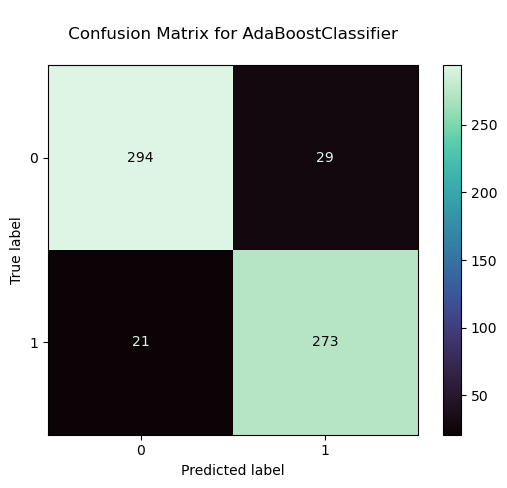

In [57]:
from sklearn import metrics

class_names = data.columns
metrics.plot_confusion_matrix(best_model.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\n Confusion Matrix for AdaBoostClassifier \n')
plt.show()

### # Saving model

In [58]:
#save model
import pickle
pickle.dump(best_model,open('HR_Analytics_project','wb'))

In [59]:
#load model
model=pickle.load(open('HR_Analytics_project','rb'))

In [60]:
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [61]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction

df

,Actual,predicted
604,0,0
1789,1,1
2328,1,1
563,0,0
1327,0,0
...,...,...
1421,0,0
827,0,1
438,0,0
1284,0,0
